<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Translating-the-features" data-toc-modified-id="Translating-the-features-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Translating the features</a></span></li></ul></li><li><span><a href="#Features" data-toc-modified-id="Features-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Features</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#knn" data-toc-modified-id="knn-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>knn</a></span></li><li><span><a href="#RFE" data-toc-modified-id="RFE-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>RFE</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Confusion Matrix</a></span></li></ul></li></ul></div>

In [3]:
import pandas as pd
train= pd.read_csv("/Users/fatimaloumaini/Downloads/train.csv")





In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 65 columns):
time_in_hospital                            25000 non-null int64
num_lab_procedures                          25000 non-null int64
num_procedures                              25000 non-null int64
num_medications                             25000 non-null int64
number_outpatient                           25000 non-null int64
number_emergency                            25000 non-null int64
number_inpatient                            25000 non-null int64
number_diagnoses                            25000 non-null int64
race_Caucasian                              25000 non-null bool
race_AfricanAmerican                        25000 non-null bool
gender_Female                               25000 non-null bool
age_[70-80)                                 25000 non-null bool
age_[60-70)                                 25000 non-null bool
age_[50-60)                                 25000 n

In [4]:
train.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
0,14,41,0,11,0,0,0,6,True,False,...,True,True,True,True,True,True,True,True,True,0
1,2,30,0,12,0,0,1,9,True,False,...,True,False,True,True,True,True,True,False,True,1
2,5,66,0,22,1,0,2,9,True,False,...,True,True,True,True,True,True,True,True,True,1
3,3,63,0,8,0,0,0,8,True,False,...,True,True,True,True,True,True,True,True,True,1
4,5,40,0,6,0,0,1,9,True,False,...,True,True,True,True,True,True,True,True,False,0


In [5]:
train["readmitted"].value_counts()

0    13590
1    11410
Name: readmitted, dtype: int64

In [6]:
train.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Caucasian',
       'race_AfricanAmerican', 'gender_Female', 'age_[70-80)', 'age_[60-70)',
       'age_[50-60)', 'age_[80-90)', 'age_[40-50)', 'payer_code_?',
       'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
       'medical_specialty_?', 'medical_specialty_InternalMedicine',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
       'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
       'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428',
       'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
       'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
       'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
     

In [7]:
train.describe()


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000
mean,4.395640,42.96012,1.341080,15.988440,0.365920,0.203280,0.64300,7.420160,0.456400
std,2.991165,19.76881,1.705398,8.107743,1.224419,0.982973,1.26286,1.940932,0.498105
min,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,2.000000,31.00000,0.000000,10.000000,0.000000,0.000000,0.00000,6.000000,0.000000
50%,4.000000,44.00000,1.000000,15.000000,0.000000,0.000000,0.00000,8.000000,0.000000
75%,6.000000,57.00000,2.000000,20.000000,0.000000,0.000000,1.00000,9.000000,1.000000
max,14.000000,126.00000,6.000000,81.000000,36.000000,64.000000,21.00000,16.000000,1.000000


## Translating the features

- payer_code_MC: Medicaid
- payer_code_HM: Health Maintenance Organization (HMO) Medicare Risk- they are HMO that contract with Medicare program to provide Medicare packages' to enrolled beneficiaries 
- payer_code_SP: Seconday payer
- payer_code_BC: Reserved for national assignment
- diag_1_428: Actinomycotic meningitis
- diag_1_414: Sepsis due to anaerobes
- diag_1_786: Chest Pain
- diag_2_276:No idea
- diag_2_428: Actinomycotic encephalitis
- diag_2_250: Spirillosis
- diag_2_427:Actinomycotic sepsis
- diag_3_250: Spirillosis
- diag_3_401: Sepsis due to strepococcus, Group B
- diag_3_276:No idea
- diag_3_428: Other forms of Actinomycotic



I should drop the ones with diag or not we will see


# Features

In [8]:
train.shape

(25000, 65)

1- time_in_hospital:

2- num_lab_procedures:

3- num_procedures:

4- num_medications:

5- number_outpatient:

6- number_emergency:

7- number_inpatient:

8- number_diagnoses:

9- race_Caucasian:

10- race_AfricanAmerican:

11- gender_Female:

12- age70-80:

13- age60-70:

14- age50-60:

15- age80-90:

16- age40-50:

17- payer_code_?:

18- payer_code_MC:

19- payer_code_HM:

20- payer_code_SP:

21- payer_code_BC:

22- medical_specialty_?:

23- medical_specialty_InternalMedicine:

24- medical_specialty_Emergency/Trauma:

25- medical_specialty_Family/GeneralPractice:

26- medical_specialty_Cardiology:

27- diag_1_428: Actinomycotic meningitis:

28- diag_1_414: Sepsis due to anaerobes:

29- diag_1_786: Chest Pain:

30- diag_2_276:No idea:

31- diag_2_428: Actinomycotic encephalitis:

32- diag_2_250: Spirillosis:

33- diag_2_427:Actinomycotic sepsis:

34- diag_3_250: Spirillosis:

35- diag_3_401: Sepsis due to strepococcus, Group B:

36- diag_3_276:No idea

37- diag_3_428: Other forms of Actinomycotic

38- max_glu_serum_None:

39- A1Cresult_None:

40- metformin_No:

41- repaglinide_No:

42- nateglinide_No:

43- chlorpropamide_No:

44- glimepiride_No:

45- nateglinide_No:

46- chlorpropamide_No:

47- glimepiride_No:

48- acetohexamide_No:

49- glipizide_No:

50- glyburide_No:

51- tolbutamide_No:

52- pioglitazone_No:

53- rosiglitazone_No:

54- acarbose_No:

55- miglitol_No:

56- troglitazone_No:

57- tolazamide_No:

58- examide_No:

59- citoglipton_No

60- insulin_No

61- glyburide-metformin_No

62- glipizide-metformin_No

63- glimepiride-pioglitazone_No

64- metformin-rosiglitazone_No

65- metformin-pioglitazone_No

66- change_No

67- diabetesMed_Yes
Target
readmitted

**Target**- readmitted: Target to predict




In [9]:
train["diag_1_428"].value_counts()

False    23377
True      1623
Name: diag_1_428, dtype: int64

In [10]:
test_null = train.isnull().values.any

In [11]:
train.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000
mean,4.395640,42.96012,1.341080,15.988440,0.365920,0.203280,0.64300,7.420160,0.456400
std,2.991165,19.76881,1.705398,8.107743,1.224419,0.982973,1.26286,1.940932,0.498105
min,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,2.000000,31.00000,0.000000,10.000000,0.000000,0.000000,0.00000,6.000000,0.000000
50%,4.000000,44.00000,1.000000,15.000000,0.000000,0.000000,0.00000,8.000000,0.000000
75%,6.000000,57.00000,2.000000,20.000000,0.000000,0.000000,1.00000,9.000000,1.000000
max,14.000000,126.00000,6.000000,81.000000,36.000000,64.000000,21.00000,16.000000,1.000000


In [12]:
train.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Caucasian',
       'race_AfricanAmerican', 'gender_Female', 'age_[70-80)', 'age_[60-70)',
       'age_[50-60)', 'age_[80-90)', 'age_[40-50)', 'payer_code_?',
       'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
       'medical_specialty_?', 'medical_specialty_InternalMedicine',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
       'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
       'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428',
       'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
       'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
       'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
     

# EDA

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
np.set_printoptions(suppress=True) # Suppress scientific notation where possible


In [14]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [15]:
train.shape

(25000, 65)

In [16]:
# As usual, create our train/test split
# This will become particularly important as we calculate our error metrics

X_train, X_test, y_train, y_test = train_test_split(train.drop(['readmitted'],axis = 1), train['readmitted'], \
                                                            test_size=0.3, random_state=41)

In [17]:
X_test.head()


,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,examide_No,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes
17413,4,37,0,8,0,0,4,7,False,True,...,True,True,False,True,True,True,True,True,True,True
18578,3,44,0,15,1,0,0,9,False,False,...,True,True,True,False,True,True,True,True,False,True
9109,1,54,0,7,0,0,0,9,False,True,...,True,True,False,True,True,True,True,True,True,True
3274,2,20,0,12,0,0,0,9,True,False,...,True,True,True,True,True,True,True,True,True,True
7965,2,40,0,5,0,0,0,3,True,False,...,True,True,False,True,True,True,True,True,True,True


In [18]:
# Let's look at feature target relationshoip

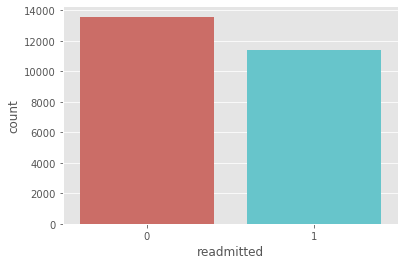

<Figure size 432x288 with 0 Axes>

In [19]:
sns.countplot(x = train['readmitted'],data=train,palette='hls')
plt.show()
plt.savefig("countplot")

In [20]:
train.groupby('readmitted').mean()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,examide_No,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes
readmitted,,,,,,,,,,,,,,,,,,,,,
0,4.237822,42.233996,1.419132,15.569610,0.268212,0.112656,0.392494,7.200662,0.731273,0.192494,...,1.0,1.0,0.490802,0.994923,0.999926,1.000000,1.0,1.0,0.565489,0.744224
1,4.583611,43.824978,1.248116,16.487292,0.482296,0.311218,0.941367,7.681595,0.755039,0.192901,...,1.0,1.0,0.442331,0.992112,0.999737,0.999912,1.0,1.0,0.515337,0.795004


In [21]:
train.groupby("diabetesMed_Yes").mean()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,race_AfricanAmerican,...,examide_No,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,readmitted
diabetesMed_Yes,,,,,,,,,,,,,,,,,,,,,
False,4.033878,41.835082,1.363715,13.127085,0.307137,0.160619,0.593465,7.318487,0.752193,0.185727,...,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,0.402236
True,4.505291,43.301121,1.334219,16.855721,0.383737,0.216211,0.658014,7.450977,0.739067,0.194788,...,1.0,1.0,0.307636,0.991712,0.999792,0.999948,1.0,1.0,0.403961,0.472817


In [22]:
train.groupby("race_AfricanAmerican").mean()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,race_Caucasian,gender_Female,...,citoglipton_No,insulin_No,glyburide-metformin_No,glipizide-metformin_No,glimepiride-pioglitazone_No,metformin-rosiglitazone_No,metformin-pioglitazone_No,change_No,diabetesMed_Yes,readmitted
race_AfricanAmerican,,,,,,,,,,,,,,,,,,,,,
False,4.375960,42.697468,1.361393,16.113908,0.393995,0.187485,0.629441,7.486697,0.919239,0.517663,...,1.0,0.480999,0.993361,0.999802,0.99995,1.0,1.0,0.540603,0.765397,0.456275
True,4.478098,44.060619,1.255968,15.462736,0.248287,0.269462,0.699813,7.141374,0.000000,0.620511,...,1.0,0.417065,0.994810,1.000000,1.00000,1.0,1.0,0.550965,0.775794,0.456923


Few observations:
- the average time in hospital for readmitted and non readmitted patient is around 4 days
- No big changes on num_lab, num_medications, number_diagnosis, race
- The number of oupatient, inpatient, emergencies for readmitted patients is almost the double compared to to the non readmitted patients
- Surprisingly the num_procedures is lower for readmitted patients

## knn


In [23]:
knn = KNeighborsClassifier(n_neighbors=5)
something = knn.fit(X_train, y_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, y_test)))


The score for kNN is
Training:  72.23%
Test set:  56.04%


In [24]:
something

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
# More feature engineering needed or recursive feature selection

I am not able to change anything by tuning the value of C

## RFE

In [26]:
data_final_vars=train.columns.values.tolist()
y=['readmitted']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

[False False False False False  True  True False  True  True False False
 False False False False False False False False  True False False  True
 False False  True False False False False  True False  True False False
 False False False False  True  True False False False False False  True
 False False  True  True  True  True False False False  True  True  True
 False False False  True]
[40 45 36 44 24  1  1 30  1  1 27  5  6  9  7  8 15 18 29 14  1  2 35  1
  3 32  1 33 39 37 10  1 28  1  4 17 38 43 42 22  1  1 11 20 12 34 26  1
 31 41  1  1  1  1 16 19 25  1  1  1 21 13 23  1]


/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [27]:
cols =['number_emergency',
       'number_inpatient','race_Caucasian',
       'race_AfricanAmerican', 'payer_code_BC',
       'medical_specialty_Emergency/Trauma','diag_1_428',
       'diag_2_250',
       'diag_3_250',
       'repaglinide_No', 'nateglinide_No',
       'tolbutamide_No','acarbose_No',
       'miglitol_No', 'troglitazone_No', 'tolazamide_No','glyburide-metformin_No',
       'glipizide-metformin_No',
       'diabetesMed_Yes']

In [28]:
new_X_train = X_train[cols]
new_y_train = y_train
new_X_test = X_test[cols]
new_y_test = y_test


In [29]:
logit = LogisticRegression(C = 0.95)
logit.fit(new_X_train, new_y_train)
#print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(new_X_train, new_y_train)))
# print("Test set: {:6.2f}%".format(100*logit.score(new_X_test, new_y_test)))

/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training:  62.28%


Removing features didn't increase the accuracy

In [30]:
print(X_train.shape, new_X_train.shape)

(17500, 64) (17500, 19)


In [31]:
# import statsmodels.api as sm
# logit_model=sm.Logit(new_y_train,new_X_train)
# result=logit_model.fit()
# print(result.summary2())

In [32]:
train.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
count,25000.000000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.00000,25000.000000,25000.000000
mean,4.395640,42.96012,1.341080,15.988440,0.365920,0.203280,0.64300,7.420160,0.456400
std,2.991165,19.76881,1.705398,8.107743,1.224419,0.982973,1.26286,1.940932,0.498105
min,1.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000
25%,2.000000,31.00000,0.000000,10.000000,0.000000,0.000000,0.00000,6.000000,0.000000
50%,4.000000,44.00000,1.000000,15.000000,0.000000,0.000000,0.00000,8.000000,0.000000
75%,6.000000,57.00000,2.000000,20.000000,0.000000,0.000000,1.00000,9.000000,1.000000
max,14.000000,126.00000,6.000000,81.000000,36.000000,64.000000,21.00000,16.000000,1.000000


In [33]:
# implementing the model following RFE

In [34]:
train.shape

(25000, 65)

In [35]:
train.columns

Index(['time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'race_Caucasian',
       'race_AfricanAmerican', 'gender_Female', 'age_[70-80)', 'age_[60-70)',
       'age_[50-60)', 'age_[80-90)', 'age_[40-50)', 'payer_code_?',
       'payer_code_MC', 'payer_code_HM', 'payer_code_SP', 'payer_code_BC',
       'medical_specialty_?', 'medical_specialty_InternalMedicine',
       'medical_specialty_Emergency/Trauma',
       'medical_specialty_Family/GeneralPractice',
       'medical_specialty_Cardiology', 'diag_1_428', 'diag_1_414',
       'diag_1_786', 'diag_2_276', 'diag_2_428', 'diag_2_250', 'diag_2_427',
       'diag_3_250', 'diag_3_401', 'diag_3_276', 'diag_3_428',
       'max_glu_serum_None', 'A1Cresult_None', 'metformin_No',
       'repaglinide_No', 'nateglinide_No', 'chlorpropamide_No',
       'glimepiride_No', 'acetohexamide_No', 'glipizide_No', 'glyburide_No',
     

In [36]:
# premiere ligne 6,7,9,10 deuxieme ligne 21,24 troisieme ligne 27,32,34,41,42,48,52,53,54,58,59,60,64

In [48]:
logit_ = LogisticRegression
(C = 0.15, penalty = 'l2')
logit_.fit(X_train, y_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))

/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for logistic regression is
Training:  62.67%
Test set:  62.45%


In [46]:
logit = LogisticRegression(C = 0.05, penalty = 'l1')
logit.fit(X_train, y_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))

/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The score for logistic regression is
Training:  62.67%
Test set:  62.45%


In [44]:
# Let's do a prediction of the first 5 observations from logistic

logit.predict_proba(X_test[:5])

array([[0.32314258, 0.67685742],
       [0.46401744, 0.53598256],
       [0.61372985, 0.38627015],
       [0.58963179, 0.41036821],
       [0.68583097, 0.31416903]])

## Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix

print("kNN confusion matrix: \n\n", confusion_matrix(label_test, knn.predict(X_test)))

kNN confusion matrix: 

 [[2701 1393]
 [1904 1502]]


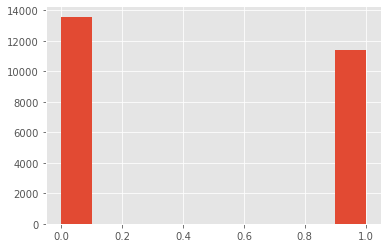

In [48]:
train.readmitted.hist()

In [49]:
train["readmitted"].value_counts()

0    13590
1    11410
Name: readmitted, dtype: int64

In [50]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    readmission_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(readmission_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['readmitted', 'n_readmitted'],
           yticklabels=['readmitted', 'n_readmitted']);
    plt.xlabel('prediction')
    plt.ylabel('actual')


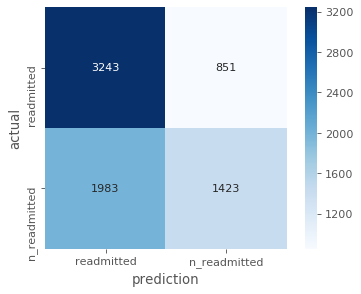

In [51]:
make_confusion_matrix(logit)

In [53]:
# Let's see how our confusion matrix changes with changes to the cutoff! 

from ipywidgets import interactive, FloatSlider

interactive(lambda threshold: make_confusion_matrix(logit, threshold), threshold=(0.0,1.0,0.02))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In formula:
$$ \text{Precision} = \frac{\text{(True positives)}}{\text{Predicted positives}} = \frac{\text{True positives}}{\text{True positives} + \text{False postitives}}$$
and
$$ \text{Recall} = \frac{\text{True positives}}{\text{Actual positives}} = \frac{\text{True positives}}{\text{True positives} + \text{False negatives}}$$

##Precision= 3243/(3243+851)

In [127]:
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [128]:
def pairwise_distances(x1,x2):
    X1.shape= [M*N]# M points with n dimensions
    X2.shape = [K*N]# K points with n dimensions
    # trying to do the distance between everypoint in X1 and X2 between my train and test
    dist = zeros(M,K)
    for i, x1 in enumerate(X1):
        for j,x2 in enumerate(x2):
            dist[i,j] = distance(x[i:], y[j:])
        return dist
    

In [ ]:
def knn_predict(x_train, y_train, x_test, k):
    dist = parwise_dist(x_train, x_test)
    y_pred = zeros((kj))
    for i in range(k):
        #I need for each data in test a prediction
        dist_i = dist[:,i]
        dist_ind = argsort(dist_i)[:k]
        #getting every y of neigbors
        neighbor_y = take(y_train, dist_ind)
        y_pred[i] = max_vote(neighbor_y)
    